# Contents
1. SQL <br>
  1.1 Ejemplos consultas <br>
  1.2 Joins <br>
  1.3 Conexión python <br>
2. EDA <br>
  2.1. Syntax, variables, data types <br>
  2.2. Loops <br>
  2.3. Conditionals <br>
  2.4. Functions <br>

## 1 SQL

Structured Query Language (SQL) es el lenguaje dominante para operaciones de **almacenamiento, manipulación y consulta de bases de datos relacionales**.

Existen variados software que utilizan SQL, algunos de pago y otros open source:
Microsoft SQL Server Management Studio
Oracle
Postgres SQL
MySQL

Objetos de una base de datos:

1) **Tablas**: colecciones de registros (filas) que comparten los mismos atributos (columnas). Es la forma más común y simple de almacenar datos en una BD.
- Llave primaria: es un campo de la tabla que identifica de forma única cada fila (no puede ser NULL).

2) **Vistas**: son el resultado de una consulta previamente diseñada sobre la o las tablas y otros objetos de la BD (otras vistas). Ejemplo: realizar agregaciones. 

3) **Procedimientos almacenados**: rutinas (código) que ejecutan operaciones utilizando los objetos de la BD y que se pueden almacenar para su uso habitual. Ejemplo: crear nuevos objetos a partir de los existentes.

El lenguaje es muy amigable y los comandos se pueden resumir en un 'cheat sheet' https://www.zentut.com/wp-content/uploads/2012/10/sqlcheatsheet.jpg

### 1.1 Ejemplos consultas

Ir a https://www.sql-practice.com/ y realizar las siguientes consultas de la tabla *patients*:

1) Seleccionar todos los datos de la tabla. ¿Cuántos pacientes (observaciones/filas) hay? <br>
2) Selecionar las columnas first_name, last_name y height <br>
3) ¿Cuántas alturas distintas (únicas) hay? <br>
4) Seleccionar todos los pacientes y ordenar descendentemente por altura <br>
5) Seleccionar los pacientes que sean de la ciudad Paris <br>
6) Seleccionar nombre y apellido de los pacientes que pesen entre 40 y 50 <br>

Datos agrupados:

7) Contar los pacientes, a través del primer nombre, que son de la ciudad Paris (hint: utilizar función COUNT) <br>
8) Agrupar los pacientes por ciudad y contarlos. Seleccionar estas dos columnas: ciudad y count <br>
9)  Agrupar los pacientes por ciudad, promediar la estatura y renombrar la columna como "promedio_estatura". hint: utilizar función avg<br>
10) A la consulta anterior ordenar de forma decendiente. <br>

### 1.2 Joins

Los joins de tablas permiten unir dos o más tablas a través de una o más llaves. Se pueden realizar en sql y python

cheat sheet de joins: https://ingenieriadesoftware.es/wp-content/uploads/2018/07/sqljoin.jpeg


### 1.3 Conexión con Python

Librería pyodbc permite la conexión con bases de datos escritas en SQL y permite escribir consultas y recibir los datos en el programa en python.

## 2 EDA (House Pricing)

Objetivo del proyecto "house pricing": Predecir el precio de una vivienda (tarea de regresión: diversas variables explicativas y una variable objetivo). Para esto se tienen diferentes atributos de una casa y el precio objetivo. Nosotros nos enfocaremos en la parte Exploratory Data Analysis (EDA).

*En el caso de tener una duda con una variable, revisar archivo de texto "data_description".

### 2.0 Librerías a utilizar

In [ ]:
#Librerías manejo de datos
import pandas as pd
import numpy as np
#Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

#Librería que filtra warnings innecesarios
import warnings
warnings.filterwarnings("ignore")

### 2.1 Descripción general de las variables

In [ ]:
#Cargamos el dataset desde repositorio github
url = "https://raw.githubusercontent.com/benvasquez10/house_prices/main/train.csv" #La forma más sencilla de cargar un archivo csv
df = pd.read_csv(url)

Buscamos en primera instancia saber cuántas filas y columnas hay, nombres de los atributos (columnas), cuáles atributos son númericos o categóricos, cuántos missing values hay, entre otros.

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

A priori (por sentido económico) debe haber algunas variables que son más importantes que otras (tienen mayor correlación con el precio).

Para algunas columnas muchas filas son missing values: solo 7 valores para PoolQC, 281 Fence, 91 alley.

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.describe()
#describe entrega estadísticas de variables numéricas

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- métdodo describe retorna 38 columnas => (81-38) columnas son categóricas o textos.
- OverallQual and OverallCon fluctúan entre 1 y 10.
- YearBuilt tiene como promedio el año 1971.26
- SalePrice tiene como valor mínimo 34,900 y máximo 755,000 dólares.


Variable objetivo

<Axes: xlabel='SalePrice', ylabel='Density'>

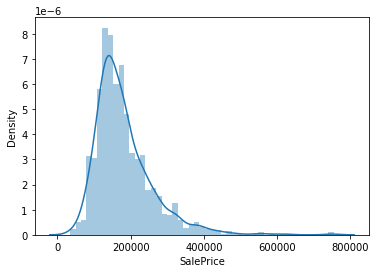

In [ ]:
#Distribución de densidad de la variable objetivo
sns.distplot(df['SalePrice'])

La variable objetivo SalePrice no sigue una distribución normal. Esto puede reducir el desempeño de algunos modelos de regresión, porque algunos asumen una distribución normal (para más info revisar https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070).

Haremos una transformación logarítmica.

<Axes: xlabel='SalePrice_Log', ylabel='Density'>

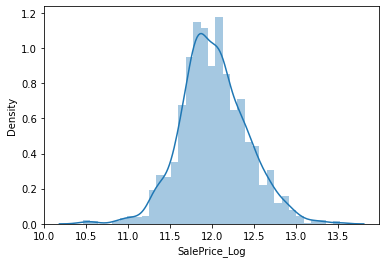

In [ ]:
df['SalePrice_Log'] = np.log(df['SalePrice']) #creamos una nueva columna con la transformación

sns.distplot(df['SalePrice_Log']) #generamos el gráfico

#df = df.drop('SalePrice', axis= 1,) #se elimina la columna SalePrice

Variables numéricas y categóricas

In [ ]:
#revisamos los tipos de datos de todas las columnas

df.dtypes#[df.dtypes != "object"]#.index

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
SalePrice_Log    float64
Length: 82, dtype: object

In [ ]:
numerical_feats = df.dtypes[df.dtypes != "object"].index #se guarda los nombres de las columnas numéricas
print("Number of Numerical features: ", len(numerical_feats)) #se "imprime" en pantalla

categorical_feats = df.dtypes[df.dtypes == "object"].index #
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  39
Number of Categorical features:  43


In [ ]:
numerical_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_Log'],
      dtype='object')

### 2.2 Missing values

In [ ]:
df.isnull()#.sum()#.sort_values(ascending=False) #se ordena de manera descendente

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_Log
0,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()#.sort_values(ascending=False) #se ordena de manera descendente

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
SalePrice_Log       0
Length: 82, dtype: int64

In [ ]:
#ranking de missings
total_missings = df.isnull().sum().sort_values(ascending=False) #total missings por columna ordenados del mayor al menor

In [ ]:
df.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
SalePrice_Log    1460
Length: 82, dtype: int64

In [ ]:
total_datos = df.isnull().count()

In [ ]:
percent_missings = (total_missings/total_datos).sort_values(ascending=False)*100 #porcentaje de missings con respecto al total
percent_missings

In [ ]:
#Unimos tablas de total de missings y su porcentaje respectivo
missing_data = pd.concat([total_missings, percent_missings], axis=1, keys=['Total', 'Percent']) #se une la serie total con la serie porcentaje
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [ ]:
missing_data.head(20) #se revisan los primeros 20 resultados 

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945


**Completar los valores nulos**

Si miramos la descripción de datos, encontramos que en realidad algunas variables con missing values en realidad quieren decir "no alley", "no pool", "no fireplace", "no fence", etc.

In [ ]:
# columnas donde NaN tienen significado
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

In [ ]:
#se llenan los valores NaN con método fillna()
df["PoolQC"] = df["PoolQC"].fillna("None")

#equivalente
#df["PoolQC"].fillna('None',inplace=True)

In [ ]:
#se utiliza un loop para llenar los Nan de manera "pythonística"
for col in cols_fillna:
    df[col].fillna('None',inplace=True)

Realizamos mismo ejercio anterior para ver los missing values

In [ ]:
total_missings = df.isnull().sum().sort_values(ascending=False) #total missings por columna ordenados del mayor al menor
percent_missings = (total_missings/df.isnull().count()).sort_values(ascending=False)*100 #porcentaje de missings con respecto al total
missing_data = pd.concat([total_missings, percent_missings], axis=1, keys=['Total', 'Percent']) #se une la serie total con la serie porcentaje
missing_data.head()

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
Id,0,0.000000
KitchenAbvGr,0,0.000000


Completamos con el promedio las columnas restantes

In [ ]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
df.fillna(df.mean(), inplace=True)

In [ ]:
#mismo ejercicio para plotear los missings
total_missings = df.isnull().sum().sort_values(ascending=False) #total missings por columna ordenados del mayor al menor
percent_missings = (total_missings/df.isnull().count()).sort_values(ascending=False) #porcentaje de missings con respecto al total
missing_data = pd.concat([total_missings, percent_missings], axis=1, keys=['Total', 'Percent']) #se une la serie total con la serie porcentaje
missing_data.head()

,Total,Percent
Id,0,0.0
GarageCars,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


### 2.3 Outliers y relación de variables con variable objetivo

Buscamos encontrar las variables con mayor correlación con la variable objetivo "SalePrice_Log".

**Variables numéricas**

In [ ]:
#Método correlación (pearson por defecto)
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901,0.336156
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241,0.429531
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.372023


In [ ]:
#Nos interesa solo la columna "SalePrice_Log" con respecto a todas las variables
df.corr()["SalePrice_Log"] 

Id              -0.017942
MSSubClass      -0.073959
LotFrontage      0.336156
LotArea          0.257320
OverallQual      0.817184
OverallCond     -0.036868
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.429531
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209044
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
GarageYrBlt      0.500449
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057329
YrSold          -0.037263
SalePrice        0.948374
SalePrice_Lo

In [ ]:
corr = df.corr() #matriz de correlación en variables numéricas
corr_abs = corr.abs() #valor abosluto a toda la tabla

ser_corr = corr_abs["SalePrice_Log"].sort_values(ascending=False) #ordenamos de mayor a menor

In [ ]:
ser_corr #.reset_index()

SalePrice_Log    1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
MiscVal          0.020021
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2  

In [ ]:
#variables con una correlación mayor a 0.4
ser_corr[ser_corr.values > 0.4]

SalePrice_Log    1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
Name: SalePrice_Log, dtype: float64

In [ ]:
#guardamos esta la lista de variables con mayor correlación
cols_abv_corr_limit = list(ser_corr[ser_corr.values > 0.4].index)

cols_abv_corr_limit

['SalePrice_Log',
 'SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea']

Graficamos un scatter plot a las primeras 5 variales con mayor correlación

<Axes: xlabel='OverallQual', ylabel='SalePrice_Log'>

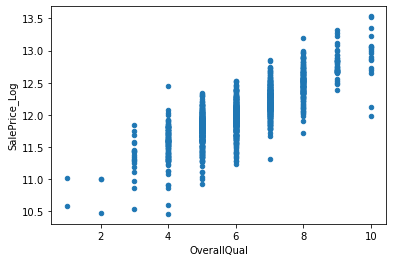

In [ ]:
df.plot.scatter(x="OverallQual", y="SalePrice_Log")

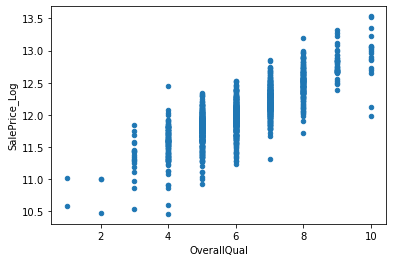

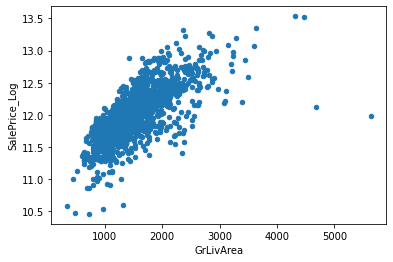

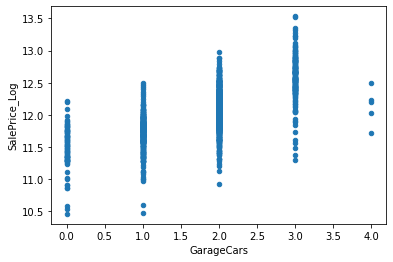

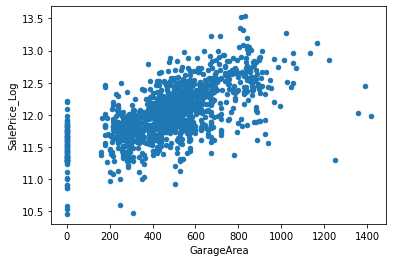

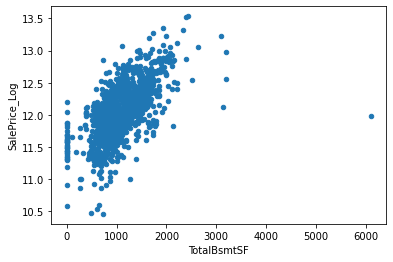

In [ ]:
for variable in cols_abv_corr_limit[2:7]: #graficaremos desde el valor 3, ya que el valor 1 y 2 de la lista son la variable objetivo
  df.plot.scatter(x=variable, y="SalePrice_Log")

Quitamos outliers

In [ ]:
df2 = df[(df["GrLivArea"]<4000) & (df["GarageArea"]<1200) & (df["TotalBsmtSF"]<4000)]

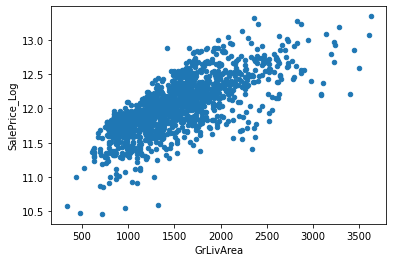

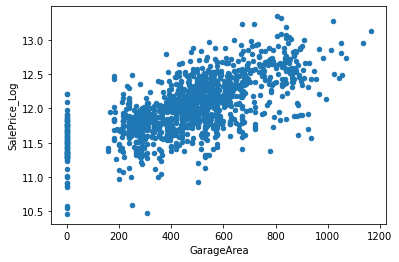

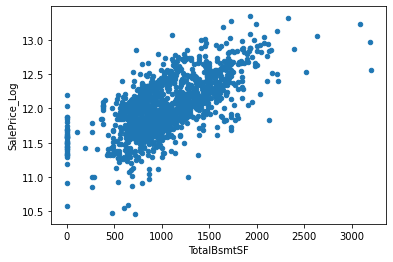

In [ ]:
for variable in ["GrLivArea", "GarageArea", "TotalBsmtSF"]: #graficaremos desde el valor 3, ya que el valor 1 y 2 de la lista son la variable objetivo
  df2.plot.scatter(x=variable, y="SalePrice_Log")

1) Al quitar los outliers evidentes, aparecen nuevas observaciones que parecen alejadas. Quizás se puede volver a filtrar de nuevo datos. <br>
2) Revisar outliers en las demás variables relevantes (las de mayor correlación), ya que debiesen entrar en el modelo a entrenar.

**Variables categóricas**

Una variable categórica presenta una reación fuerte con la variable objetivo cuando al cambiar de categoría también cambia el valor en la variable categórica.

In [ ]:
list(categorical_feats)#[:5]

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<Axes: xlabel='Street', ylabel='SalePrice_Log'>

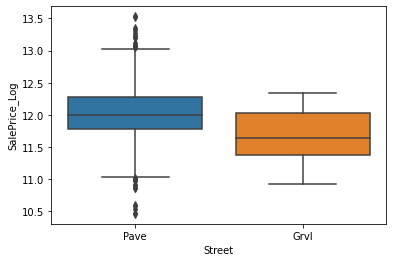

In [ ]:
sns.boxplot(data=df, x="Street", y="SalePrice_Log")

In [ ]:
df["Street"].value_counts()

La variable Street no tiene una relación fuerte con la variable "SalePrice_Log", debido a que diferentes categorias tienen un precio similar.

Quitamos outliers de la variable "Street"

In [ ]:
df2 = df.drop(df[(df['Street']=="Pave") & (df['SalePrice_Log']<11)].index)

Código estándar de revisión de variables categóricas: 

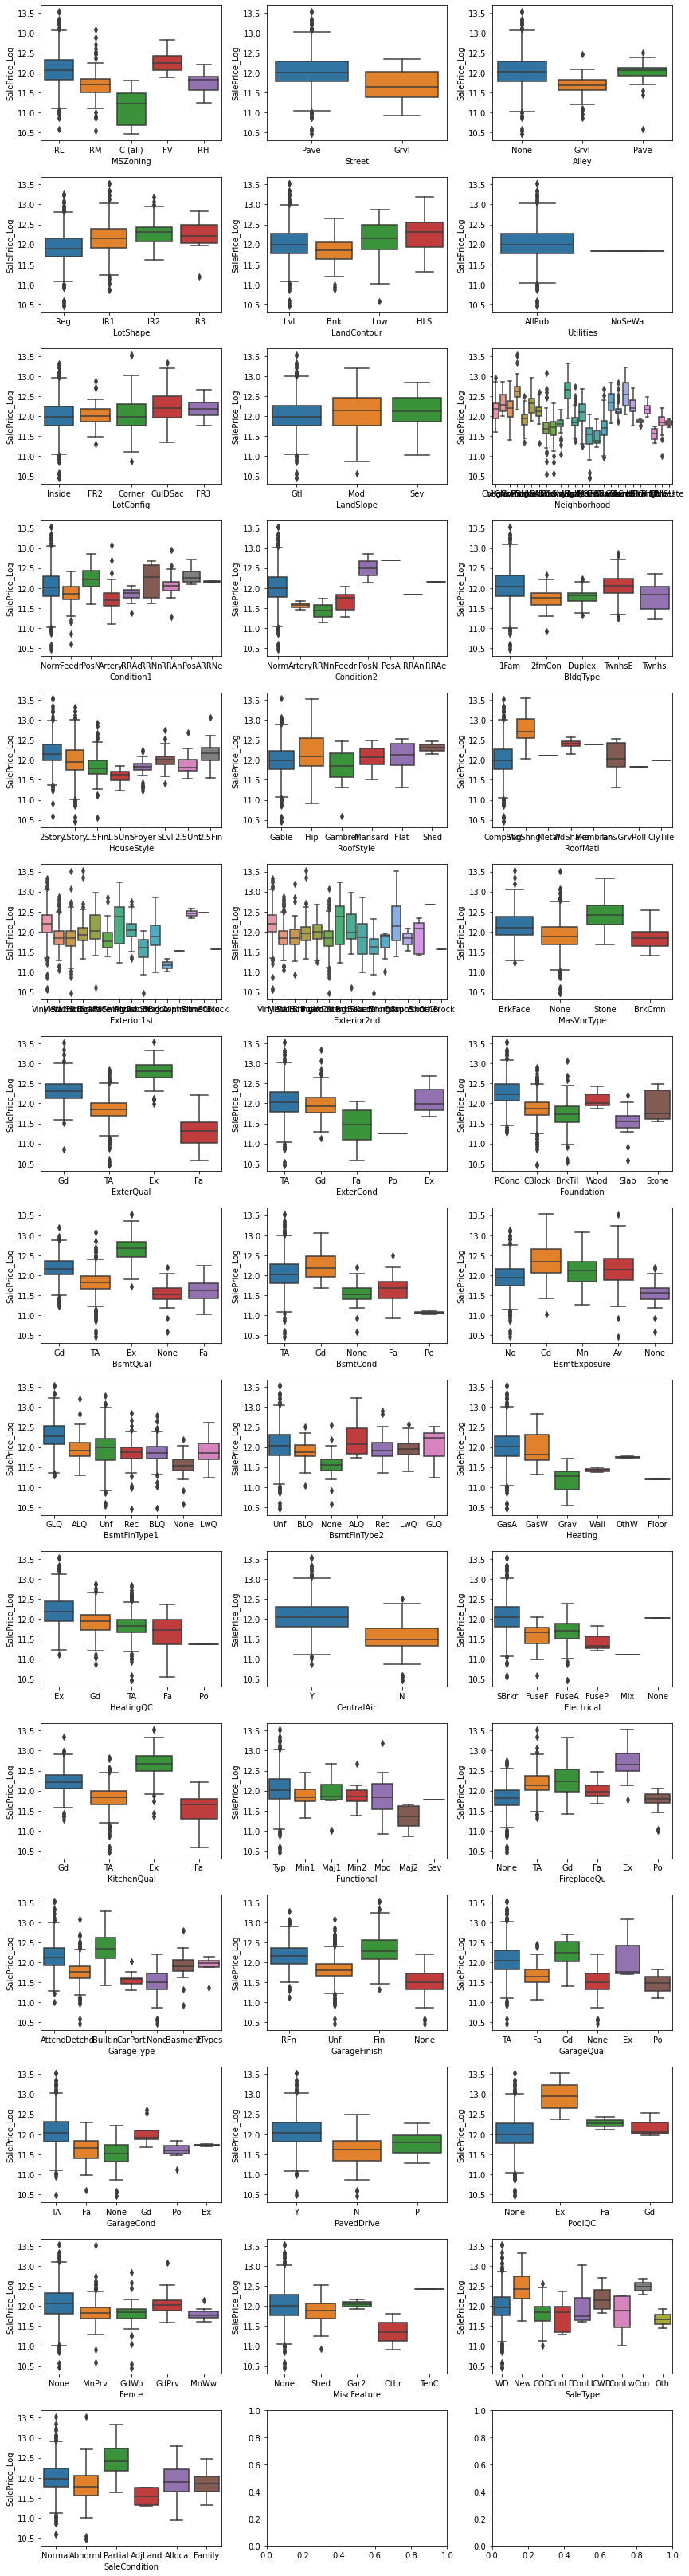

In [ ]:
li_cat_feats = list(categorical_feats) #lista de variables categóricas
nr_rows = 15 #numero de filas que tendrá el gráfico
nr_cols = 3 #número de columnas

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(data=df, x=li_cat_feats[i], y="SalePrice_Log", ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

*Pueden utilizar este código que es estándar o revisar las variables una por una (este ejemplo tiene muchas variables, quizás más de las que puede tener un dataset promedio).

Quitamos un par de outliers más

In [ ]:
#Kitchen qual
df3= df2.drop(df2[(df2['KitchenQual']=="TA") & (df2['SalePrice_Log']<11)].index)

Revisar variables con correlación fuerte y quitar outliers a las demás variables.

### 2.4 Transformación de variables

In [ ]:
df3["LotFrontage"] = df3["LotFrontage"].astype(float) #Se transforma a float
df3["LotFrontage"] = df3["LotFrontage"].astype(int) #Se transforma a integer
df3["LotFrontage"] = df3["LotFrontage"].astype(str) #Se transforma a string texto
df3["date"] = pd.to_datetime(df3["date"]) #Se transforma a fecha

### 2.5 Train test split

In [ ]:
#Filtramos las columnas a utilizar. Tienen correlación mayor o igual a 0.4
#Observamos
df3[cols_abv_corr_limit]

In [ ]:
X = df3[cols_abv_corr_limit]
X #observamos

In [ ]:
#Quitamos las y, variables objetivo
X = X.drop(['SalePrice_Log', 'SalePrice'], axis=1)
X

In [ ]:
y = df3['SalePrice_Log']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)